# NLP - CA2
## Liar Classifier
### Parnian Fazel - 810198516

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns
import nltk

In [2]:
train_df = pd.read_csv("train_final.csv", encoding = "latin-1")
test_df = pd.read_csv("test_final.csv", encoding = "latin-1")
train_df.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,ID,label,statement,subject,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,0,0,0,0,0,0,2635.json,false,Says the Annies List political group supports ...,abortion,...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,1,1,1,1,1,1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,2,2,2,2,2,2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,...,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,3,3,3,3,3,3,1123.json,false,Health care reform legislation is likely to ma...,health-care,...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,4,4,4,4,4,4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN


In [3]:
columns_list_to_keep = ["label", "statement", "sentiment_score", "sentiment_magnitude", "anger", "fear", "joy", "disgust", "sad"]

train_df = train_df[columns_list_to_keep]
test_df = test_df[columns_list_to_keep]
train_df

,label,statement,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,false,Says the Annies List political group supports ...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887
1,half-true,When did the decline of coal start? It started...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453
3,false,Health care reform legislation is likely to ma...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403
4,half-true,The economic turnaround started at the end of ...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343
...,...,...,...,...,...,...,...,...,...
10231,mostly-true,There are a larger number of shark attacks in ...,-0.6,0.6,0.354176,0.290966,0.020772,0.176219,0.216899
10232,mostly-true,Democrats have now become the party of the [At...,0.0,0.0,0.189920,0.077568,0.050404,0.196092,0.410885
10233,half-true,Says an alternative to Social Security that op...,-0.4,0.4,0.119778,0.206043,0.152902,0.095003,0.220693
10234,false,On lifting the U.S. Cuban embargo and allowing...,0.0,0.0,0.113820,0.066778,0.312947,0.242768,0.084354


### Train dataframe information

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10236 entries, 0 to 10235
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   label                10236 non-null  object 
 1   statement            10236 non-null  object 
 2   sentiment_score      10236 non-null  float64
 3   sentiment_magnitude  10236 non-null  float64
 4   anger                10236 non-null  float64
 5   fear                 10236 non-null  float64
 6   joy                  10236 non-null  float64
 7   disgust              10236 non-null  float64
 8   sad                  10236 non-null  float64
dtypes: float64(7), object(2)
memory usage: 719.8+ KB


In [5]:
train_df["label"].value_counts()

half-true      2113
false          1992
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: label, dtype: int64

### Here we are to consider “barely true” labels, “fire pants” and “FALSE’ as lie, and “half-true”, “mostly-true” and “TRUE” labels as the truth. 

In [6]:
#lie labels
train_df.loc[train_df["label"] == "barely-true" , "label"] = 1
train_df.loc[train_df["label"] == "pants-fire" , "label"] = 1
train_df.loc[train_df["label"] == "false" , "label"] = 1

test_df.loc[test_df["label"] == "barely-true" , "label"] = 1
test_df.loc[test_df["label"] == "pants-fire" , "label"] = 1
test_df.loc[test_df["label"] == "false" , "label"] = 1

#truth labels
train_df.loc[train_df["label"] == "half-true" , "label"] = 0
train_df.loc[train_df["label"] == "mostly-true" , "label"] = 0
train_df.loc[train_df["label"] == "true" , "label"] = 0

test_df.loc[test_df["label"] == "half-true" , "label"] = 0
test_df.loc[test_df["label"] == "mostly-true" , "label"] = 0
test_df.loc[test_df["label"] == "true" , "label"] = 0


train_df.head(10)

,label,statement,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,1,Says the Annies List political group supports ...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887
1,0,When did the decline of coal start? It started...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045
2,0,"Hillary Clinton agrees with John McCain ""by vo...",-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453
3,1,Health care reform legislation is likely to ma...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403
4,0,The economic turnaround started at the end of ...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343
5,0,The Chicago Bears have had more starting quart...,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971
6,1,Jim Dunnam has not lived in the district he re...,-0.6,0.6,0.093937,0.019159,0.278842,0.110865,0.172604
7,0,I'm the only person on this stage who has work...,-0.2,0.2,0.021023,0.077569,0.032182,0.038037,0.438594
8,0,"However, it took $19.5 million in Oregon Lotte...",-0.3,0.3,0.116767,0.099105,0.219329,0.051303,0.114302
9,0,Says GOP primary opponents Glenn Grothman and ...,-0.4,0.4,0.163977,0.101336,0.109979,0.330754,0.203412


In [7]:
train_df['label'] = train_df['label'].astype(float, errors = 'raise')
test_df['label'] = test_df['label'].astype(float, errors = 'raise')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10236 entries, 0 to 10235
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   label                10236 non-null  float64
 1   statement            10236 non-null  object 
 2   sentiment_score      10236 non-null  float64
 3   sentiment_magnitude  10236 non-null  float64
 4   anger                10236 non-null  float64
 5   fear                 10236 non-null  float64
 6   joy                  10236 non-null  float64
 7   disgust              10236 non-null  float64
 8   sad                  10236 non-null  float64
dtypes: float64(8), object(1)
memory usage: 719.8+ KB


0.0    5751
1.0    4485
Name: label, dtype: int64
------------------------------------


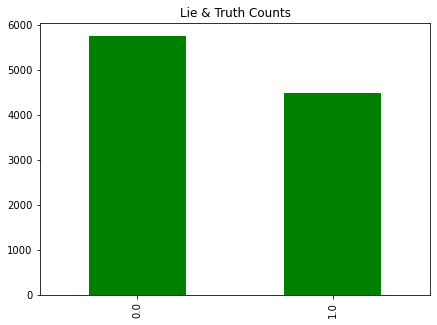

In [9]:
print(train_df["label"].value_counts())
print("------------------------------------")

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
plt.title('Lie & Truth Counts')
train_df["label"].value_counts().plot.bar(color = 'green')
plt.show()

Text(0.5, 1.0, 'Multi-Collinearity of House Attributes')

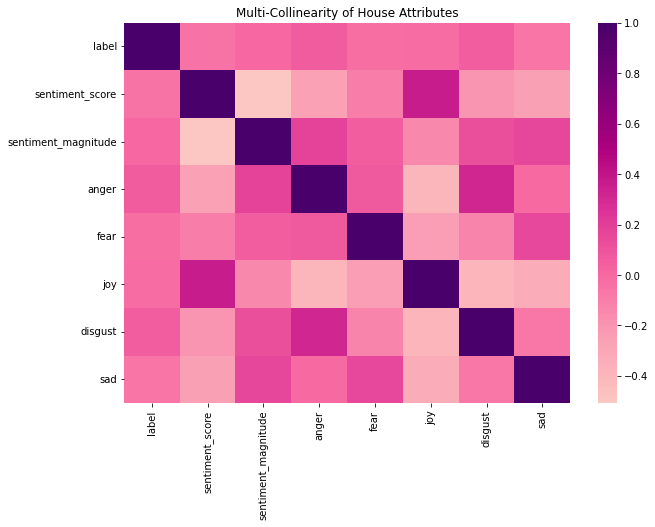

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(train_df.corr(), center=0, cmap='RdPu')
ax.set_title('Multi-Collinearity of House Attributes')

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10236 entries, 0 to 10235
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   label                10236 non-null  float64
 1   statement            10236 non-null  object 
 2   sentiment_score      10236 non-null  float64
 3   sentiment_magnitude  10236 non-null  float64
 4   anger                10236 non-null  float64
 5   fear                 10236 non-null  float64
 6   joy                  10236 non-null  float64
 7   disgust              10236 non-null  float64
 8   sad                  10236 non-null  float64
dtypes: float64(8), object(1)
memory usage: 719.8+ KB


In [12]:
train_df["label"].value_counts()

0.0    5751
1.0    4485
Name: label, dtype: int64

### Nan

In [13]:
train_df.isna().sum()

label                  0
statement              0
sentiment_score        0
sentiment_magnitude    0
anger                  0
fear                   0
joy                    0
disgust                0
sad                    0
dtype: int64

### Cleaning Data

In [14]:
from nltk.stem import PorterStemmer
def get_word_tokens(raw):
    return nltk.word_tokenize(raw)

def remove_stop_words(tokens):
    return [word for word in tokens if not word in nltk_stopwords.words("english")]

def normalize_words(tokens):
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]
    return tokens

def lemmatize_words(tokens):
    ps = PorterStemmer()
#     lemmatizer = WordNetLemmatizer()
#     return [lemmatizer.lemmatize(word) for word in tokens]
    return [ps.stem(word) for word in tokens]
def clean_text(text):
    tokens = get_word_tokens(text)
    tokens = normalize_words(tokens)
    tokens = remove_stop_words(tokens)
    tokens = lemmatize_words(tokens)
    return tokens

def clean_data(all_X):
    cleaned_X = []
    for item in all_X:
        cleaned_item = clean_text(item)
        cleaned_X.append(cleaned_item)
    return cleaned_X

### Extracting Features

In [15]:
for sent in ["anger", "fear", "joy", "disgust", "sad"]:
    print(f"{sent} median = {train_df[sent].median()}")

anger median = 0.128523
fear median = 0.10621549999999999
joy median = 0.128076
disgust median = 0.1584215
sad median = 0.28799450000000004


In [16]:
sentiments = ["anger", "fear", "joy", "disgust", "sad"]
for sent in sentiments:
    train_df[sent] = np.where(train_df[sent] < train_df[sent].median(), 0, 1)
    test_df[sent] = np.where(test_df[sent] < test_df[sent].median(), 0, 1)

one_hot_train_df = train_df   
one_hot_test_df = test_df


for sent in sentiments:
    one_hot_train_df = pd.concat([one_hot_train_df, pd.get_dummies(one_hot_train_df[sent], prefix=sent)], axis = 1)
    one_hot_test_df = pd.concat([one_hot_test_df, pd.get_dummies(one_hot_test_df[sent], prefix=sent)], axis = 1)

one_hot_train_df["sentiment"] = np.where(train_df["sentiment_score"] < 0, 0, 1)
one_hot_test_df["sentiment"] = np.where(test_df["sentiment_score"] < 0, 0, 1)

In [17]:
train_df.head()

,label,statement,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,1.0,Says the Annies List political group supports ...,-0.5,0.5,0,0,0,1,1
1,0.0,When did the decline of coal start? It started...,-0.4,0.8,0,1,1,0,0
2,0.0,"Hillary Clinton agrees with John McCain ""by vo...",-0.3,0.3,0,0,1,1,0
3,1.0,Health care reform legislation is likely to ma...,-0.3,0.3,0,1,1,0,1
4,0.0,The economic turnaround started at the end of ...,0.0,0.0,0,1,1,0,0


In [18]:
def calculate_bag_of_words(x_train, x_test):
    x_train_texts = [' '.join(item) for item in x_train]
    x_test_texts = [' '.join(item) for item in x_test]
    vectorizer = CountVectorizer()
    training_data = vectorizer.fit_transform(x_train_texts)
    test_data  = vectorizer.transform(x_test_texts)
    return training_data.toarray(), test_data.toarray()

def get_number_of_intensifiers_words(text):
    token_words = []
    with open('intensifiers.txt', 'r') as fp:
        c = fp.read()
        token_words = c.split('\n')
    words = clean_text(text)
    num = 0
    for w in words:
        if w in token_words:
            num += 1
    return num

def get_number_of_words_in_array(text, token_words):
    words = clean_text(text)
    num = 0
    for w in words:
        if w in token_words:
            num += 1
    return num


def extract_features(one_hot_train_df, preprocessed_data_train, one_hot_test_df, preprocessed_data_test):
        
        
    other_class = ['she', 'her', 'they', 'his', 'them', 'him', 'herself', 'himself', 'themselves', 'you']    
    I_class = ['I', 'i', 'myself', 'mine', 'our', 'myself', 'ours']
    
    bow_output_train, bow_output_test = calculate_bag_of_words(preprocessed_data_train, preprocessed_data_test)
    print("shape train bow: ", bow_output_train.shape)
    print("shape test bow: ", bow_output_train.shape)
    new_train_df = pd.DataFrame(bow_output_train)
    new_test_df = pd.DataFrame(bow_output_test)
    
    new_train_df = pd.concat([new_train_df, (one_hot_train_df['statement']).apply(lambda x: get_number_of_intensifiers_words(x)).rename('intensifier')], axis=1)
    new_test_df = pd.concat([new_test_df, one_hot_test_df['statement'].apply(lambda x: get_number_of_intensifiers_words(x)).rename('intensifier')], axis=1)

    new_train_df = pd.concat([new_train_df, one_hot_train_df['statement'].apply(lambda x: get_number_of_words_in_array(x, other_class)).rename('other')], axis=1)
    new_test_df = pd.concat([new_test_df, one_hot_test_df['statement'].apply(lambda x: get_number_of_words_in_array(x, other_class)).rename('other')], axis=1)

    new_train_df = pd.concat([new_train_df, one_hot_train_df['statement'].apply(lambda x: get_number_of_words_in_array(x, I_class)).rename('I_self')], axis=1)
    new_test_df = pd.concat([new_test_df, one_hot_test_df['statement'].apply(lambda x: get_number_of_words_in_array(x, I_class)).rename('I_self')], axis=1)
   

    columns_to_drop = ['statement', 'label', 'sentiment_score', 'sentiment_magnitude', 'anger', 'fear', 'joy', 'sad', 'disgust']
    new_train_df = pd.concat([new_train_df, one_hot_train_df.drop(columns_to_drop, axis=1)], axis=1)
    new_test_df = pd.concat([new_test_df, one_hot_test_df.drop(columns_to_drop, axis=1)], axis=1)
    
    display(new_train_df)
    return new_train_df, new_test_df

In [19]:
def print_confusion_matrix(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    ax = plt.subplot()
    sns.heatmap(conf_mat, annot = True, ax = ax, linewidths = 5, linecolor = 'y', center = 0)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels') 
    ax.set_ylabel('True Labels')
    ax.xaxis.set_ticklabels(['Truth','Lie'])
    ax.yaxis.set_ticklabels(['Truth','Lie'])
    plt.show()

def evaluate(y_test, y_pred):
    print(f"Accuracy: {format(accuracy_score(y_test, y_pred))}")
    print(f"Recall: {format(recall_score(y_test, y_pred))}")
    print(f"Precision: {format(precision_score(y_test, y_pred))}")
    print(f"F1 score: {format(f1_score(y_test, y_pred))}")
    print("classification report:\n", classification_report(y_test, y_pred))

In [20]:
def train_the_model(x_train, x_test, y_train):
    x_train, x_test, y_train = np.array(x_train), np.array(x_test), np.array(y_train)
    NB = MultinomialNB()
    y_pred = NB.fit(x_train, y_train).predict(x_test)
    return y_pred

shape train bow:  (10236, 7521)
shape test bow:  (10236, 7521)


,0,1,2,3,4,5,6,7,8,9,...,anger_1,fear_0,fear_1,joy_0,joy_1,disgust_0,disgust_1,sad_0,sad_1,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,1,0,0
10232,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,1,0,1,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
10234,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,1


-----------------------------------------
number of train items:  10236
number of test items:  1267
-----------------------------------------
train value counts:
 0.0    5751
1.0    4485
Name: label, dtype: int64
----------------
test value counts
 0.0    714
1.0    553
Name: label, dtype: int64
-----------------------------------------
Accuracy: 0.6179952644041041
Recall: 0.41229656419529837
Precision: 0.5891472868217055
F1 score: 0.4851063829787234
classification report:
               precision    recall  f1-score   support

         0.0       0.63      0.78      0.70       714
         1.0       0.59      0.41      0.49       553

    accuracy                           0.62      1267
   macro avg       0.61      0.59      0.59      1267
weighted avg       0.61      0.62      0.60      1267



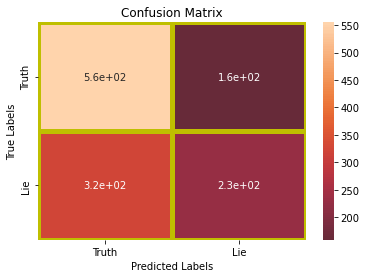

In [21]:
def classify(train_df, test_df):
    preprocessed_train_data = clean_data(train_df["statement"])
    preprocessed_test_data = clean_data(test_df["statement"])
    all_features_X_train, all_features_X_test = extract_features(one_hot_train_df, preprocessed_train_data, one_hot_test_df, preprocessed_test_data)
    x_train, y_train = all_features_X_train, train_df["label"]
    x_test, y_test = all_features_X_test, test_df["label"]

    min_max_scaler = preprocessing.MinMaxScaler()
    scaled_train = min_max_scaler.fit_transform(all_features_X_train.values)
    scaled_test = min_max_scaler.fit_transform(all_features_X_test.values)

    print('-----------------------------------------')
    print('number of train items: ', len(x_train))
    print('number of test items: ', len(x_test))
    print('-----------------------------------------')
    print('train value counts:\n', y_train.value_counts())
    print('----------------')
    print('test value counts\n', y_test.value_counts())
    print('-----------------------------------------')
    y_pred = train_the_model(scaled_train, scaled_test, y_train)
    evaluate(y_test, y_pred)
    print_confusion_matrix(y_test, y_pred)
    
    
classify(train_df, test_df)